# Mall Customer Segmentation Using K-Means Clustering Algorithm

### importing the necessary libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Data loading

In [26]:
df = pd.read_csv("mall-customers-data.csv")
df.head()
df.corr(numeric_only=True)

,customer_id,age,annual_income,spending_score
customer_id,1.000000,-0.026763,0.977548,0.013835
age,-0.026763,1.000000,-0.012398,-0.327227
annual_income,0.977548,-0.012398,1.000000,0.009903
spending_score,0.013835,-0.327227,0.009903,1.000000


### Distribution of annual income

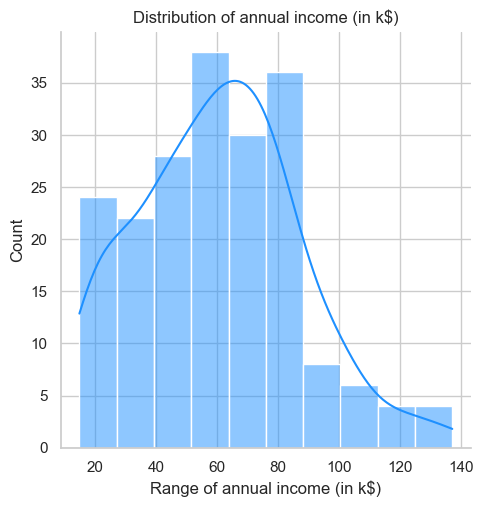

In [27]:
sns.set(style="whitegrid")
sns.displot(df["annual_income"], kde=True, color="dodgerblue")

plt.title("Distribution of annual income (in k$)")
plt.xlabel("Range of annual income (in k$)")
plt.ylabel("Count")

plt.show()

### Distribution of age

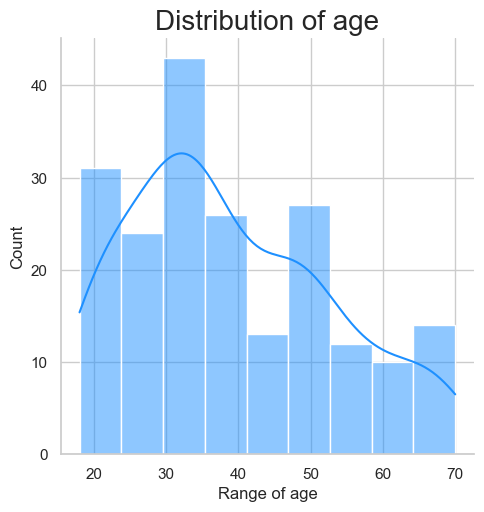

In [28]:
sns.set(style="whitegrid")
sns.displot(df["age"], kde=True, color="dodgerblue")

plt.title('Distribution of age', fontsize = 20)
plt.xlabel('Range of age')
plt.ylabel('Count')

plt.show()

### Distribution of spending score

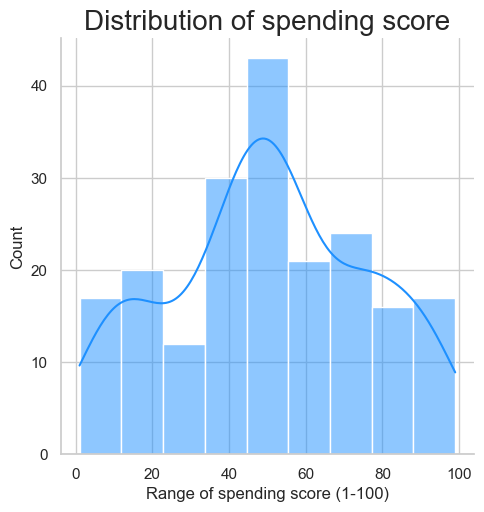

In [39]:
sns.set(style="whitegrid")
sns.displot(df["spending_score"], kde=True, color="dodgerblue")

plt.title('Distribution of spending score', fontsize = 20)
plt.xlabel('Range of spending score (1-100)')
plt.ylabel('Count')

plt.show()

### Gender analysis

C:\Users\Prajwal Bangi\AppData\Local\Temp\ipykernel_25392\3444657715.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genders.index, y=genders.values, palette=colors)
C:\Users\Prajwal Bangi\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Prajwal Bangi\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


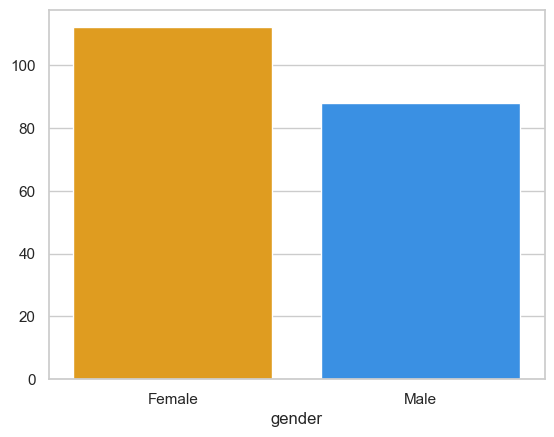

In [ ]:
genders = df["gender"].value_counts()

colors = {
    "Male": "dodgerblue",
    "Female": "orange"
}
sns.barplot(x=genders.index, y=genders.values, palette=colors)
plt.show()

### Considering two features: annual income and spending score

In [31]:
X = df[["annual_income", "spending_score"]]
X.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Scatter plot

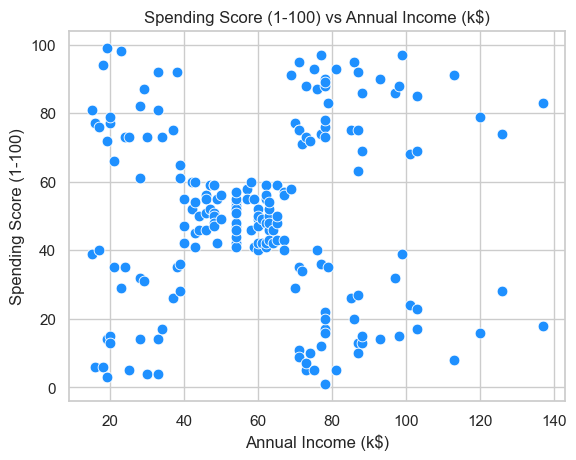

In [32]:
sns.scatterplot(x="annual_income", y="spending_score", data=X, s=60, color="dodgerblue")

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')

plt.show()

### Finding K value using Elbow method(graph)

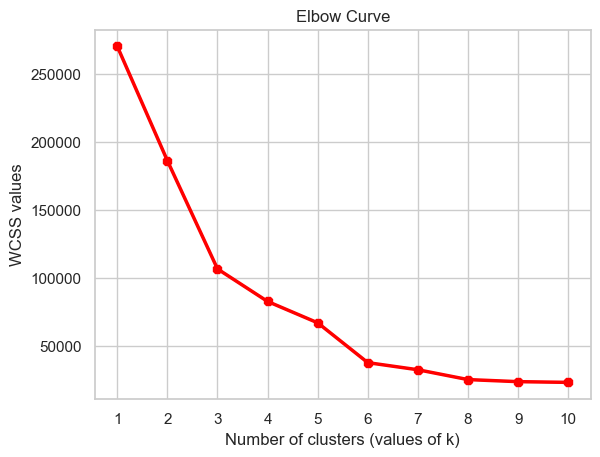

In [41]:
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, n_init="auto")
    k_means.fit(X)
    wcss.append(k_means.inertia_)
    
# the elbow curve
plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss, linewidth=2.5, color="red", marker="8")

plt.title("Elbow Curve")
plt.xlabel("Number of clusters (values of k)")
plt.ylabel("WCSS values")
plt.xticks(np.arange(1, 11, 1))

plt.show()

In [42]:
# taking k = 5
k_means_1 = KMeans(n_clusters=3, n_init="auto")
k_means_1.fit(X)
y_pred = k_means_1.predict(X)
df["label"] = y_pred
df.head()

,customer_id,gender,age,annual_income,spending_score,label
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


# scatterplot of the clusters

C:\Users\Prajwal Bangi\AppData\Local\Temp\ipykernel_25392\4017058244.py:3: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(


Text(0.5, 1.0, 'Spending Score (1-100) vs Annual Income (in k$)')

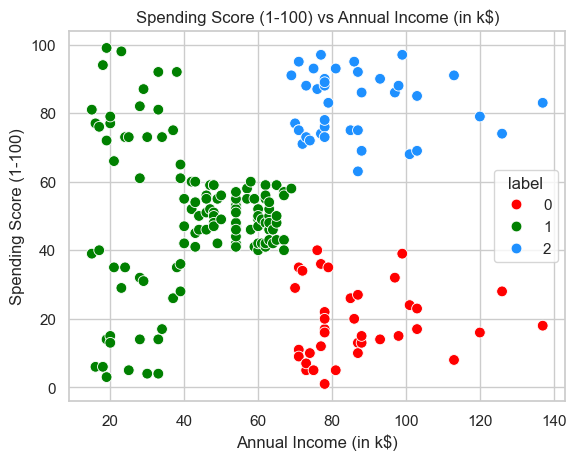

In [43]:
colors = ["red", "green", "dodgerblue", "gold", "purple"]

sns.scatterplot(
    x="annual_income",
    y="spending_score",
    hue="label", 
    palette=colors, 
    legend="full", 
    data=df, 
    s=60
)

plt.xlabel('Annual Income (in k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (in k$)')